Руденко Мирослава, бс-82

### **Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка**

 

1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.






In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
df = pd.DataFrame({
    'gammaD': np.random.gamma(shape=1, size=20),
    'normalD1': np.random.normal(loc=10, scale=5, size=20),
    'geometricD': np.random.geometric(p=0.5, size=20),
    'uniformD': np.random.uniform(size=20),
    'normalD2': np.random.normal(loc=5, scale=10, size=20),
    'normalD3': np.random.randn(20)
})

n=df.shape[0]

df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
gammaD,0.328927,1.782592,0.795666,0.918361,0.705476,0.989159,0.334124,0.340014,0.403575,0.886667,0.679682,0.110435,0.022186,0.414918,0.489051,0.538759,0.654151,0.761717,0.659541,0.905842
normalD1,12.001479,7.297286,12.327568,8.035374,16.066301,19.042552,8.388071,11.375580,10.907810,15.411585,3.786702,-0.424029,0.899471,12.647904,18.809491,-4.223991,8.448735,11.056657,17.516753,11.826167
geometricD,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,6.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
uniformD,0.141970,0.924987,0.741798,0.424708,0.127124,0.170021,0.198217,0.080754,0.942334,0.692394,0.064565,0.987454,0.739810,0.840480,0.206116,0.614808,0.343707,0.106015,0.790452,0.201575
normalD2,6.417760,22.651522,1.497140,25.340964,6.349746,-2.392384,5.117266,-2.527605,3.024847,-1.440060,0.938512,20.049342,-10.921886,-13.695685,6.887594,3.515813,1.140527,3.235324,7.234346,-4.457736
normalD3,-0.354435,-1.087725,-1.851618,0.563285,-0.449205,0.048036,-0.785435,-0.825726,1.035468,1.041511,1.083744,-1.284176,0.483549,-0.470315,0.051709,-2.242226,0.127704,1.198830,0.933645,1.401566


2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку (с. 606):
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf



In [3]:
df = pd.DataFrame({key: sorted(values) for key, values in df.transpose().iterrows()})
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
gammaD,0.022186,0.110435,0.328927,0.334124,0.340014,0.403575,0.414918,0.489051,0.538759,0.654151,0.659541,0.679682,0.705476,0.761717,0.795666,0.886667,0.905842,0.918361,0.989159,1.782592
normalD1,-4.223991,-0.424029,0.899471,3.786702,7.297286,8.035374,8.388071,8.448735,10.907810,11.056657,11.375580,11.826167,12.001479,12.327568,12.647904,15.411585,16.066301,17.516753,18.809491,19.042552
geometricD,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000
uniformD,0.064565,0.080754,0.106015,0.127124,0.141970,0.170021,0.198217,0.201575,0.206116,0.343707,0.424708,0.614808,0.692394,0.739810,0.741798,0.790452,0.840480,0.924987,0.942334,0.987454
normalD2,-13.695685,-10.921886,-4.457736,-2.527605,-2.392384,-1.440060,0.938512,1.140527,1.497140,3.024847,3.235324,3.515813,5.117266,6.349746,6.417760,6.887594,7.234346,20.049342,22.651522,25.340964
normalD3,-2.242226,-1.851618,-1.284176,-1.087725,-0.825726,-0.785435,-0.470315,-0.449205,-0.354435,0.048036,0.051709,0.127704,0.483549,0.563285,0.933645,1.035468,1.041511,1.083744,1.198830,1.401566


In [4]:

def get_data_mean(array):
    return sum(array)/n

def get_data_squared_S(array, data_mean):
    return sum([(array[i]-data_mean)**2 for i in range(n)]) 

data_mean = {dist: get_data_mean(df[dist]) for dist in df}
data_squared_S = {dist: get_data_squared_S(df[dist], data_mean[dist])
                 for dist in df}

In [5]:

a=[0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def get_b(array):
    return sum([a[i]*(array[(n-1)-i]-array[i])
                for i in range(n//2)])

data_b = {dist: get_b(df[dist]) for dist in df}

In [6]:

def calculate_W(b, squared_S):
    return b**2/squared_S

data_W = {dist: calculate_W(data_b[dist], data_squared_S[dist]) for dist in df}

WTheory = sts.shapiro(df['gammaD'])
data_W, WTheory

({'gammaD': 0.9112488984864303,
  'normalD1': 0.9447657632705525,
  'geometricD': 0.530595010080645,
  'uniformD': 0.8672817691560747,
  'normalD2': 0.9196156623090844,
  'normalD3': 0.9503123614262936},
 (0.9113816618919373, 0.06772194802761078))

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

In [7]:
column_names = ["Variable", "Statistics", "Distribution"]
new_df = pd.DataFrame(columns = column_names)
new_df

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [8]:
new_df["Variable"] = df.keys()
new_df

,Variable,Statistics,Distribution
0,gammaD,NaN,NaN
1,normalD1,NaN,NaN
2,geometricD,NaN,NaN
3,uniformD,NaN,NaN
4,normalD2,NaN,NaN
5,normalD3,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [9]:
new_df["Distribution"] = [('normal ' if 'normal' in dist else 'non-normal ')+
                          str(data_W[dist])
                          for dist in new_df["Variable"]]
new_df

,Variable,Statistics,Distribution
0,gammaD,NaN,non-normal 0.9112488984864303
1,normalD1,NaN,normal 0.9447657632705525
2,geometricD,NaN,non-normal 0.530595010080645
3,uniformD,NaN,non-normal 0.8672817691560747
4,normalD2,NaN,normal 0.9196156623090844
5,normalD3,NaN,normal 0.9503123614262936


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].



In [10]:
for i in range (new_df.shape[0]):
    current_variable = new_df["Variable"][i]
    if 'normal' in current_variable:
        new_df["Statistics"][i] = f'{df[current_variable].mean()} [{df[current_variable].std()}]'

new_df

,Variable,Statistics,Distribution
0,gammaD,NaN,non-normal 0.9112488984864303
1,normalD1,10.059873157958787 [6.299827900603951],normal 0.9447657632705525
2,geometricD,NaN,non-normal 0.530595010080645
3,uniformD,NaN,non-normal 0.8672817691560747
4,normalD2,3.898267359529732 [9.835724743098961],normal 0.9196156623090844
5,normalD3,-0.06909058830338992 [1.0567404496405248],normal 0.9503123614262936


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [11]:
for i in range (new_df.shape[0]):
    current_variable = new_df["Variable"][i]
    if 'normal' not in current_variable:
        new_df["Statistics"][i] = \
        f'{df[current_variable].median()} \
        [{df[current_variable].quantile(0.25)}; {df[current_variable].quantile(0.75)}]'

new_df

,Variable,Statistics,Distribution
0,gammaD,0.656846032096778 [0.3876850646566104;...,non-normal 0.9112488984864303
1,normalD1,10.059873157958787 [6.299827900603951],normal 0.9447657632705525
2,geometricD,1.0 [1.0; 2.0],non-normal 0.530595010080645
3,uniformD,0.3842079534098577 [0.1630082138738613...,non-normal 0.8672817691560747
4,normalD2,3.898267359529732 [9.835724743098961],normal 0.9196156623090844
5,normalD3,-0.06909058830338992 [1.0567404496405248],normal 0.9503123614262936


8. Зберегти таблицю в пдф форматі

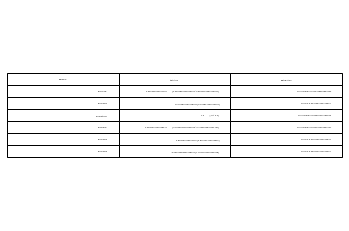

In [13]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(new_df)):
    cell_text.append(new_df.iloc[row])

ax.table(cellText=cell_text, colLabels=new_df.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(fig)
pdf.close()